# Factors Influencing US Home Prices

In [325]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


## Chosen Factors

In [326]:
# All the variables are merged into a single file inputFile.csv
# UNRATE - Unemployment Rate
# REAINTRATREARAT10Y - Real Interest Rate
# CPILFESL - Consumer Price Index
# COMPUTSA - New Housing Units completed
# WPUSI012011 - Construction Materials Price Index
# GDPPC - GDP Per Capita
# CSUSHPISA - Case-Schiller Home Price Index is our target variable

# Read inputFile.csv into pandas dataframe
df = pd.read_csv("inputFile.csv")
df.head()

,DATE,UNRATE,REAINTRATREARAT10Y,CPILFESL,COMPUTSA,WPUSI012011,GDPPC,CSUSHPISA
0,01-01-2000,4.0,3.411051,179.3,1574,144.1,45983,100.551
1,01-02-2000,4.1,3.513343,179.4,1677,144.7,45983,101.339
2,01-03-2000,4.0,3.440347,180.0,1704,145.4,45983,102.126
3,01-04-2000,3.8,3.202967,180.3,1610,145.6,46704,102.922
4,01-05-2000,4.0,3.360531,180.7,1682,144.9,46704,103.677


## Exploratory Data Analysis

In [327]:
# Summary of the dataset
df.describe()

,UNRATE,REAINTRATREARAT10Y,CPILFESL,COMPUTSA,WPUSI012011,GDPPC,CSUSHPISA
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,5.808511,1.127121,229.905330,1258.223404,206.576599,52439.617021,174.611110
std,1.967367,0.867834,32.137042,414.850901,50.722452,3967.748873,47.976841
min,3.400000,-0.407134,179.300000,520.000000,141.700000,45983.000000,100.551000
25%,4.400000,0.492443,202.575000,911.000000,172.900000,49886.000000,142.343500
50%,5.300000,1.022227,226.312000,1258.500000,203.100000,51703.500000,166.998000
75%,6.700000,1.795465,252.397500,1576.250000,222.275000,55057.000000,192.369750
max,14.700000,3.513343,308.309000,2245.000000,353.015000,60852.000000,304.817000


In [328]:
# List column names
df.columns

Index(['DATE', 'UNRATE', 'REAINTRATREARAT10Y', 'CPILFESL', 'COMPUTSA',
       'WPUSI012011', 'GDPPC', 'CSUSHPISA'],
      dtype='object')

<AxesSubplot:xlabel='CSUSHPISA', ylabel='Count'>

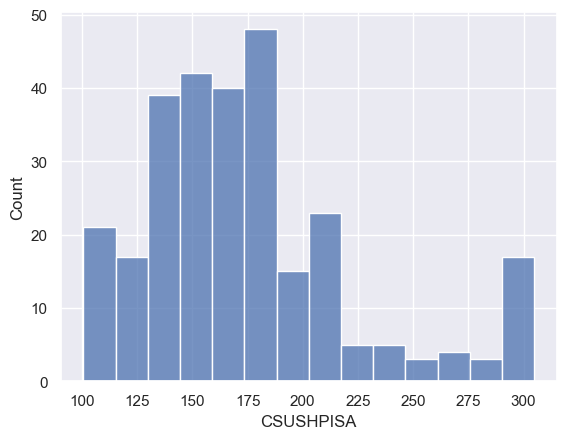

In [329]:
# Histogram plot of target variable CSUSHPISA
sns.histplot(df["CSUSHPISA"])

<AxesSubplot:xlabel='DATE', ylabel='CSUSHPISA'>

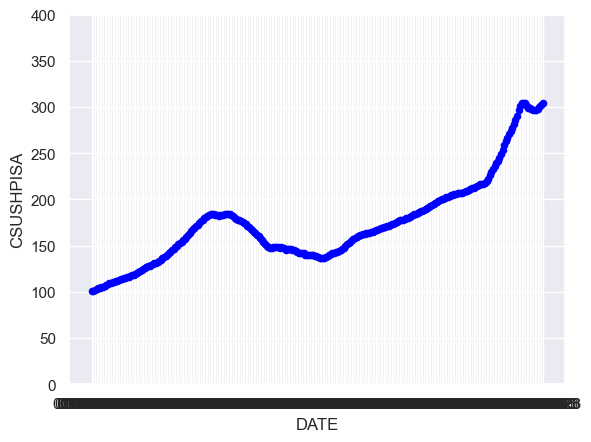

In [330]:
# Plot target variable CSUSHPISA with DATE
df.plot.scatter(x='DATE', y='CSUSHPISA', color='blue', ylim=(0,400))

<AxesSubplot:>

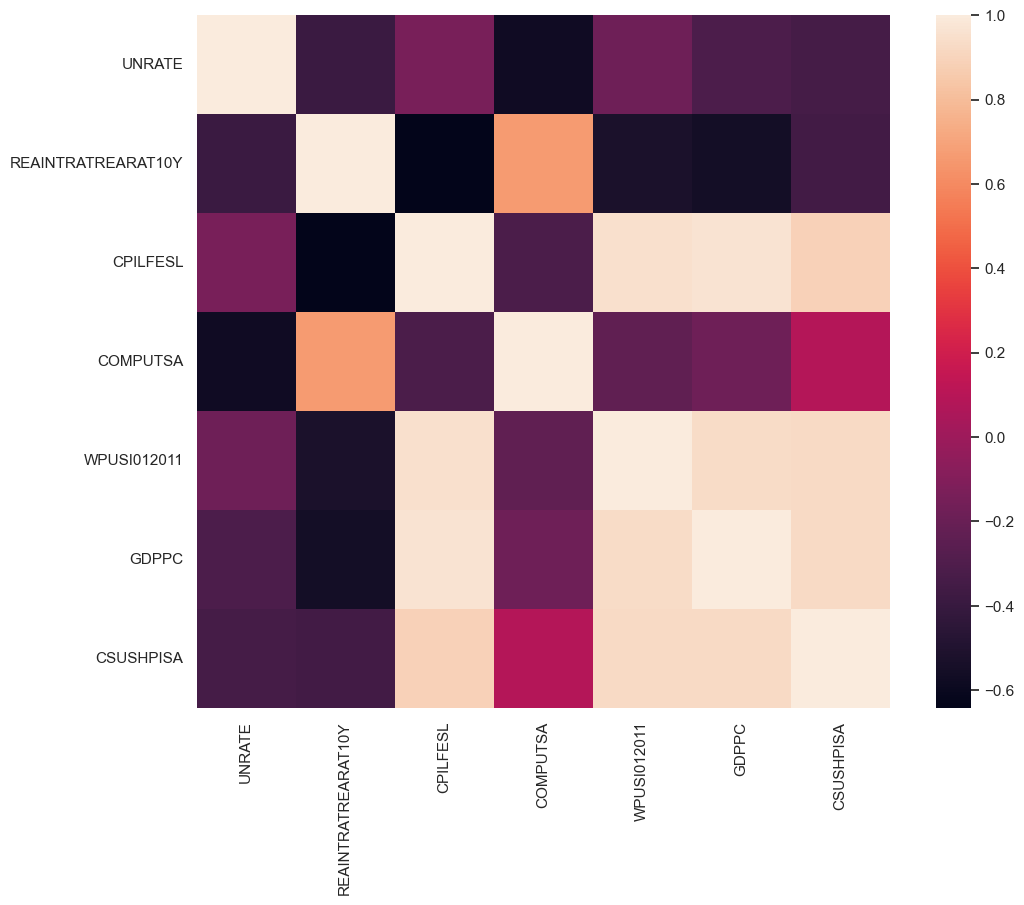

In [331]:
# Correlation matrix among all the variables
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True)

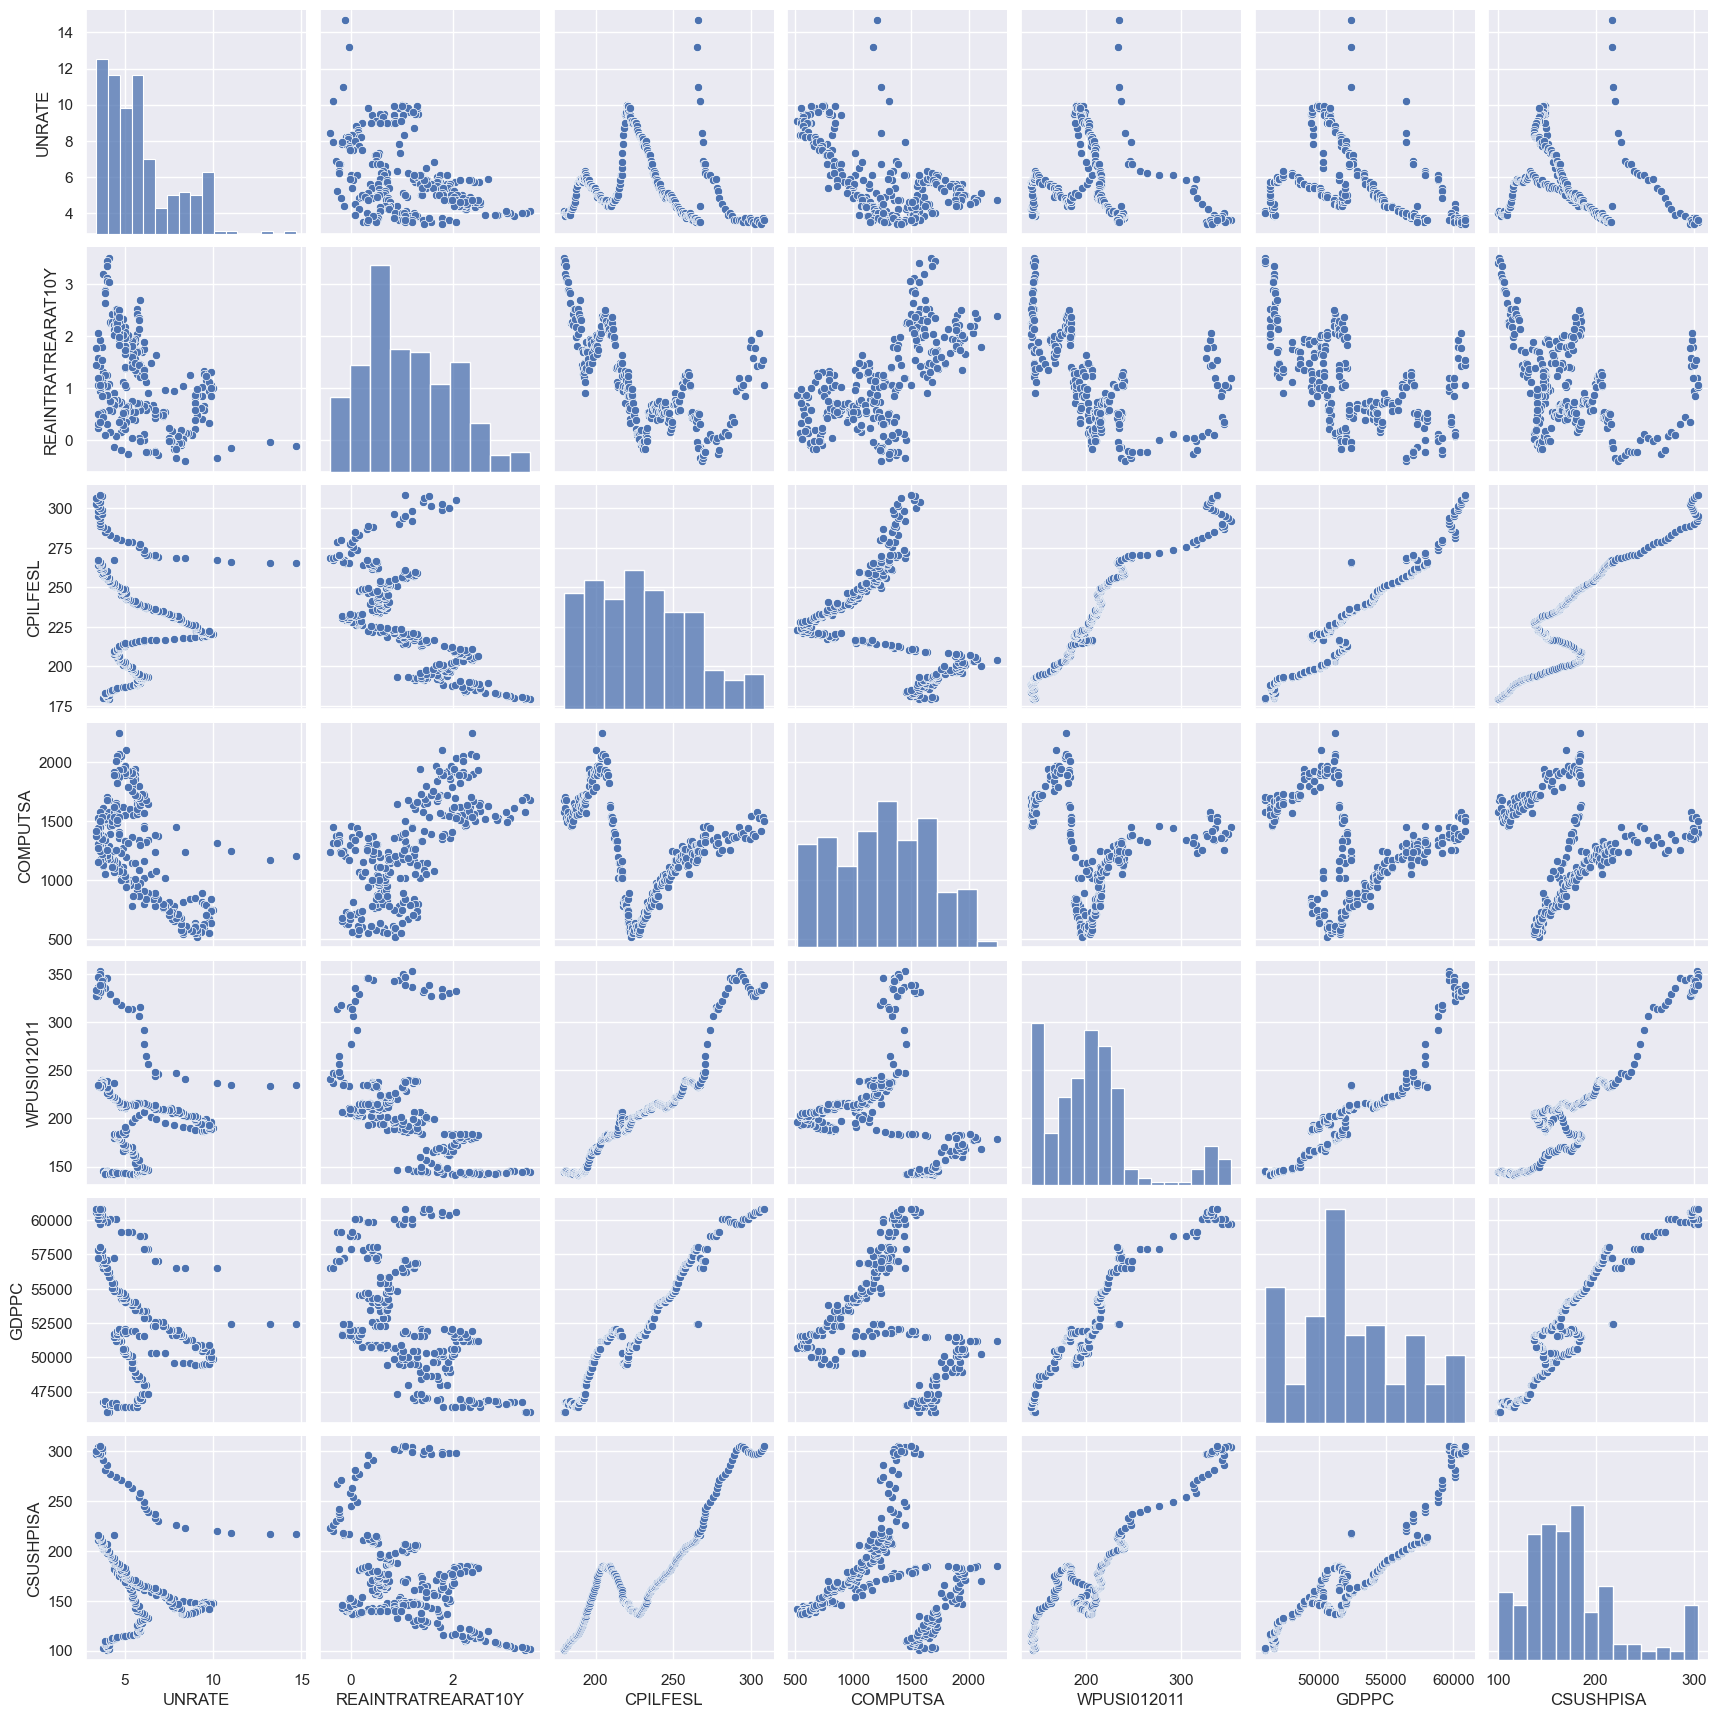

In [332]:
# Scatterplots among all the variables
sns.set()
cols = df.columns
sns.pairplot(df[cols], height = 2.5)
plt.show()

## ML Model and Predictions

In [333]:
# Spliting target variable and features variables
X = df.drop(['CSUSHPISA', "DATE"], axis = 1)
y = df['CSUSHPISA']

In [334]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

### Linear Regression

In [335]:
# Create Linear Regression model
reg = LinearRegression()

# Train the model using the training data  
reg.fit(X_train, y_train)

LinearRegression()

In [336]:
# Prediction on test data
y_pred = reg.predict(X_test)

In [337]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9736872927114294
MAE: 6.182779605195699
MSE: 60.74440720693373
RMSE: 7.793869847959596


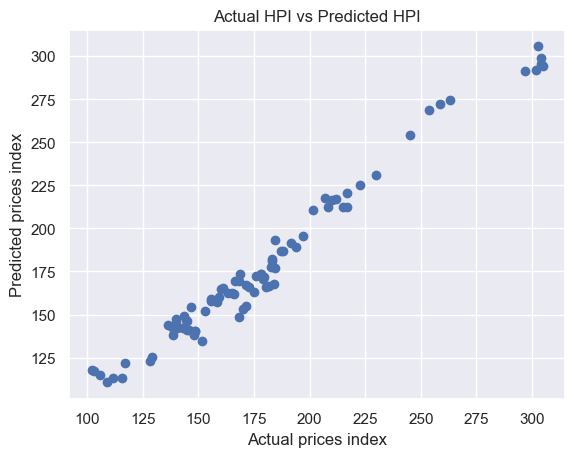

In [338]:
# Actual home prices index vs predicted index
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices index")
plt.ylabel("Predicted prices index")
plt.title("Actual HPI vs Predicted HPI")
plt.show()

### XGBoost

In [339]:
# Create XGBoost Regression model
reg = XGBRegressor()

# Train the model using the training data 
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [340]:
# Prediction on test data
y_pred = reg.predict(X_test)

In [341]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9943268764763544
MAE: 2.4089355755974258
MSE: 13.096733896525008
RMSE: 3.6189409910255526


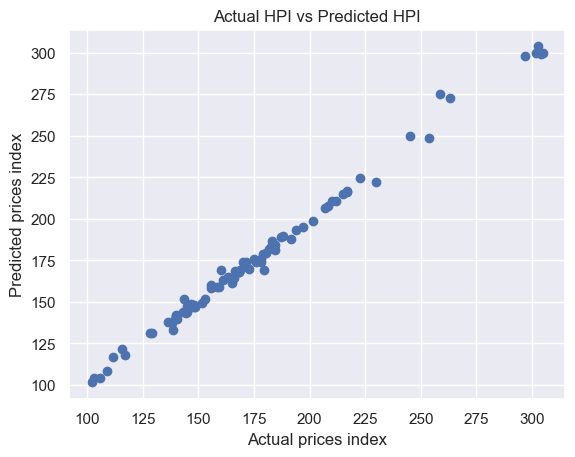

In [342]:
# Actual home prices index vs predicted index
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices index")
plt.ylabel("Predicted prices index")
plt.title("Actual HPI vs Predicted HPI")
plt.show()

### The Actual Home Prices Index(HPI) vs Predicted HPI line is at almost 45 degree angle. This is an indication of the very high accuracy of the model. This demonstrates that the chosen factors strongly influence the US Home Prices Index.